# Дипломная работа по курсу "Аналитик Данных"

# Тема " Анализ факторов, влияющих на отток пользователей кредитных карт банка, и построение модели, предсказывающей отток пользователей"


# Источник данных:  https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 1. Предобработка данных

In [28]:
#ИМПОРТ ПАКЕТОВ ПРИЛОЖЕНИЙ

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score,  precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
#ИМПОРТ ДАННЫХ
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [30]:
#ОЧИСТКА НЕРЕЛЕВАНТНЫХ ДАННЫХ
df.drop(df.columns[[-1, -2]], axis=1, inplace=True) 
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [31]:
#ПРОВЕРКА ПРОПУСКОВ ДАННЫХ 
df.isna().sum().reset_index() 

,index,0
0,CLIENTNUM,0
1,Attrition_Flag,0
2,Customer_Age,0
3,Gender,0
4,Dependent_count,0
5,Education_Level,0
6,Marital_Status,0
7,Income_Category,0
8,Card_Category,0
9,Months_on_book,0


Проверка показала, что отсутствующих данных не наблюдается.


In [32]:
# ИЗМЕНЕНИЕ НОМЕРА КЛИЕНТА НА ИНДЕКС
df = df.set_index("CLIENTNUM") 

In [33]:
#ПРОВЕРКА КОРРЕКТНОСТИ ДАННЫХ
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Максимальные и минимальные значения находятся в рамках потенциально возможных значений, аномалии в данных не наблюдаются.

In [34]:
#ПЕРЕВОД КАТЕГОРИАЛЬНЫХ ЗНАЧЕНИЙ В ЧИСЛОВЫЕ
df_categ = df[['Attrition_Flag', 'Gender', 'Income_Category', 'Marital_Status', 'Education_Level', 'Card_Category']]
df['Attrition_Flag_Num'] = df['Attrition_Flag'].map({'Existing Customer':1, 'Attrited Customer':0})
df['Gender_Num'] = df['Gender'].map({'M':0, 'F':1})
df['Income_Category_Num'] = df['Income_Category'].map({'Unknown':1, 'Less than $40K':2, '$40K - $60K':3, '$60K - $80K':4, '$80K - $120K':5, '$120K +':6})
df['Marital_Status_Num'] = df['Marital_Status'].map({'Unknown':1, 'Divorced':2, 'Single':3, 'Married':4})
df['Education_Level_Num'] = df['Education_Level'].map({'Unknown':1, 'Uneducated':1, 'High School':2, 'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6})
df['Card_Category_Num'] = df['Card_Category'].map({'Blue':1, 'Silver':2, 'Gold':3, 'Platinum':4})
df.drop(columns=['Attrition_Flag', 'Gender', 'Income_Category', 'Marital_Status', 'Education_Level', 'Card_Category'], inplace=True)


Для дальнейшего анализа категориальные значения были переведены в чиcловые. Категориальные данные, которые являются порядковыми (например, 'Income_Category_Num', 'Education_Level_Num'), были переведены в числа соответственно их рангу. 

## 2. Анализ и визуализация данных


Параметры модели:

Демографические показатели:

* Customer_Age Возраст клиента
* Dependent_count Количество иждивенцев
* Gender_Num Пол клиента
* Income_Category_Num Средний доход клиента 
* Education_Level_Num Уровень образования клиента 

Банковские показатели:
* Months_on_book Длительность обслуживания в банке, месяцы
* Total_Relationship_Count Общее количество продуктов банка, используемых клиентом
* Months_Inactive_12_mon Количество месяцев неактивности клиента за последние 12 месяцев 
* Contacts_Count_12_mon Количество контактов за последние 12 месяцев
* Credit_Limit Кредитный лимит по кредитной карте
* Total_Revolving_Bal Общий оборот по кредитной карте
* Avg_Open_To_Buy Доступный остаток кредитной карты (среднее за 12 месяцев)
* Total_Amt_Chng_Q4_Q1 Изменение в объеме трансакциий (4 квартала по сравнению с 1м)
* Total_Trans_Amt Общий объем трансакций за последние 12 месяцев
* Total_Trans_Ct Общее число трансакций за последние 12 месяцев
* Total_Ct_Chng_Q4_Q1 Изменение в количестве трансакциий (4 квартала по сравнению с 1м)
* Avg_Utilization_Ratio Средний коэффициент использования карт (чем меньше, тем меньше кредитный риск)
* Card_Category_Num Категория карты

In [35]:
#РАСЧЕТ ОСНОВНЫХ СТАТИСТИК ДАННЫХ, ВКЛЮЧАЯ МОДУ
metrics = df.describe()

mod = []

for col in df.columns:
    m = df[col].mode()[0]
    mod.append(m)
    
metrics.loc['moda'] = mod

metrics

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Num,Gender_Num,Income_Category_Num,Marital_Status_Num,Education_Level_Num,Card_Category_Num
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.839340,0.529081,3.085711,3.241039,2.751950,1.083638
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.367235,0.499178,1.474639,0.880059,1.496091,0.333784
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,1.000000,0.000000,2.000000,3.000000,1.000000,1.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,1.000000,1.000000,3.000000,3.000000,3.000000,1.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,1.000000,1.000000,4.000000,4.000000,4.000000,1.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000,1.000000,6.000000,4.000000,6.000000,4.000000
moda,44.000000,3.000000,36.000000,3.000000,3.000000,3.000000,34516.000000,0.000000,1438.300000,0.791000,4253.000000,81.000000,0.667000,0.000000,1.000000,1.000000,2.000000,4.000000,4.000000,1.000000


Усредненный портрет клиента банка выглядит следующим образом: это мужчина или женщина в возрасте 46 лет, c высшим образованием, состоящие в браке, с 2-3 иждивенцами и доходом до 40 тыс. долл.

Среднее "время жизни" клиента 3 года, за это время клиент в среднем пользуется 4 продуктами банка и обращается в банк 2,5 раза в год. Самая востребованная кредитная карта - "Синяя"(самая простая) с кредитным лимитом 8632 долл., из которых клиент использует 1162 долл (27%). Средний объем трансакций за год 4404 долл приходится на 64 трансакции (т.е. 68 долл. средняя трансакция). При этом объем трансакций упал в 4 кв по сравнению с первым кв. на 70% как в денежном, так и в количественном выражении.



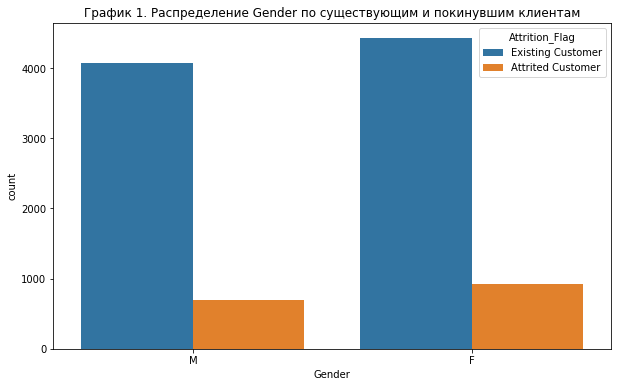

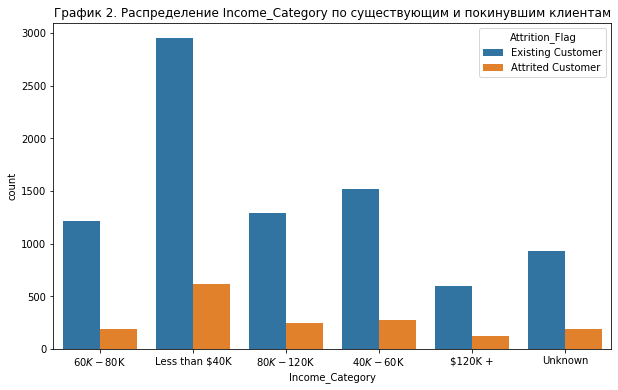

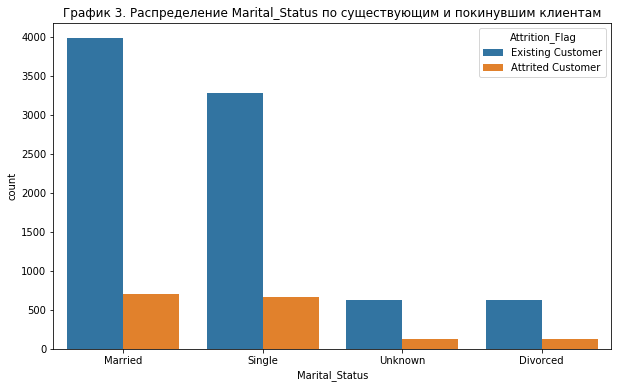

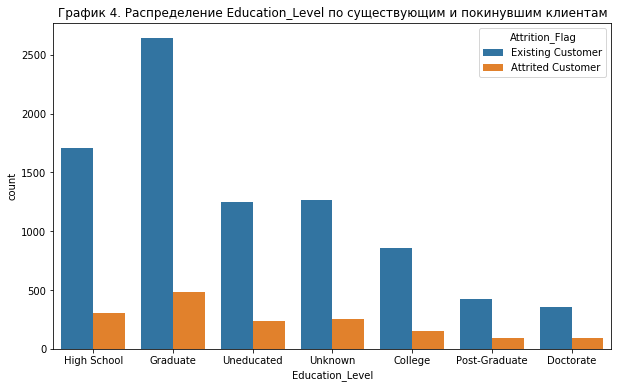

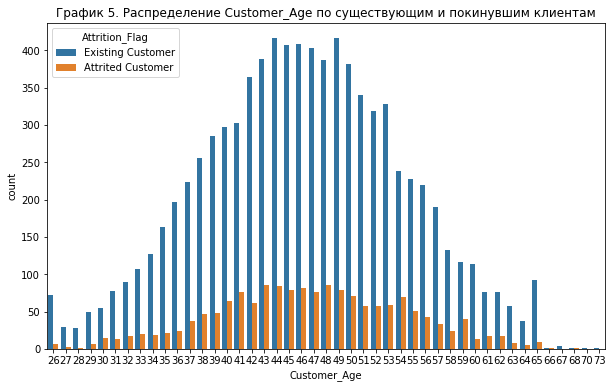

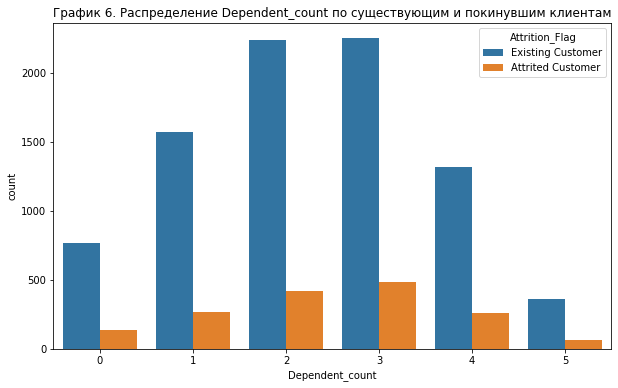

In [36]:
#ВИЗУАЛИЗАЦИЯ ДЕМОГРАФИЧЕСКИХ ПОКАЗАТЕЛЕЙ ПО СУЩЕСТВУЮЩИМ И ПОКИНУВШИМ КЛИЕНТАМ
df_dem = df_categ.drop(['Card_Category'], axis=1)
df_dem['Customer_Age'] = df['Customer_Age']
df_dem['Dependent_count'] = df['Dependent_count']
i=0

for x in df_dem .columns:
    if x != 'Attrition_Flag':
        sns.countplot(df_dem[x],hue=df_dem['Attrition_Flag'])
        fig=plt.gcf()
        fig.set_size_inches(10,6)

        i = i+1
        plt.title(f'График {i}. Распределение {x} по существующим и покинувшим клиентам')
        plt.show() 

Выводы по графикам:
* Среди клиентов женщин чуть больше, чем мужчин
* Самой большая группа как существующих, так и покинувших клиентов, располагает до 40 тыс долл. - самой низкой категорией дохода. В целом распределение по доходу существующих и покинувших клиентов похоже, но среди покинувших меньше доля клиентов в категории до  40 тыс долл.
* Большинство клиентов состоят в браке, при этом из банка уходит примерно одинаковое количество состоящих и не состоящих в браке клиентов.
* Распределение существующих  и покинувших клиентов по возрасту имеет форму нормального распределения; у распределения  покинувших клиентов пик гораздо более пологий. 
* Большинство существующих, так и покинувших клиентов имеют по 2-3 иждевенца.

In [37]:
#ВИЗУАЛИЗАЦИЯ БАНКОВСКИХ ПОКАЗАТЕЛЕЙ ПО СУЩЕСТВУЮЩИМ И ПОКИНУВШИМ КЛИЕНТАМ
df_dem = df_categ.drop(['Card_Category'], axis=1)
df_dem['Customer_Age'] = df['Customer_Age']


In [38]:
df_bank = df.drop(columns=['Gender_Num', 'Income_Category_Num', 'Marital_Status_Num', 'Education_Level_Num', 'Card_Category_Num', 'Customer_Age','Dependent_count'])

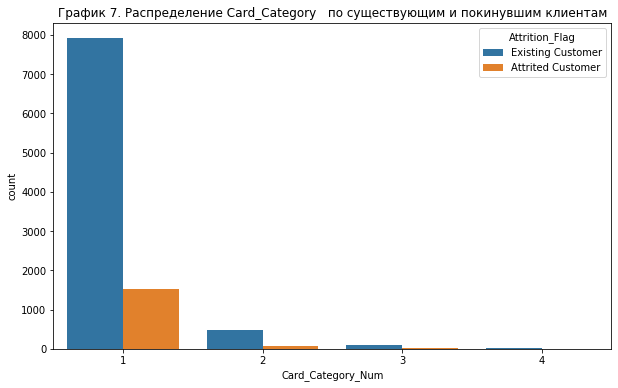

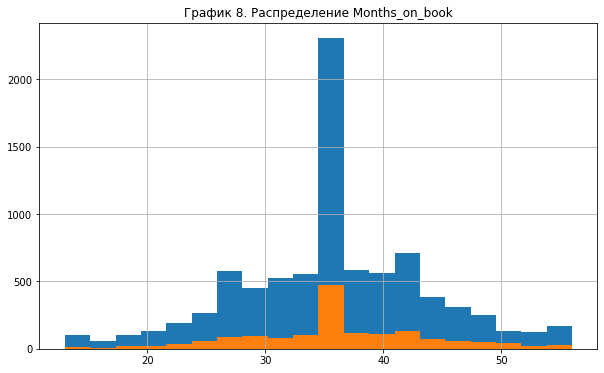

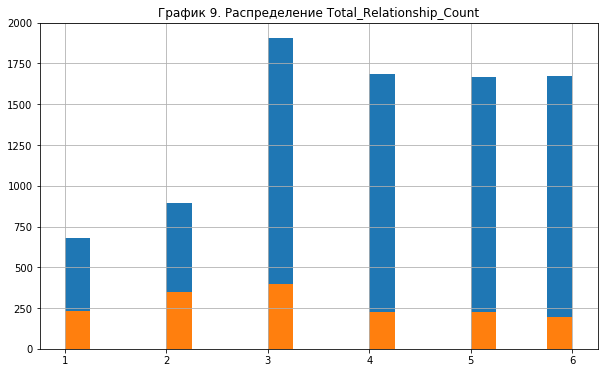

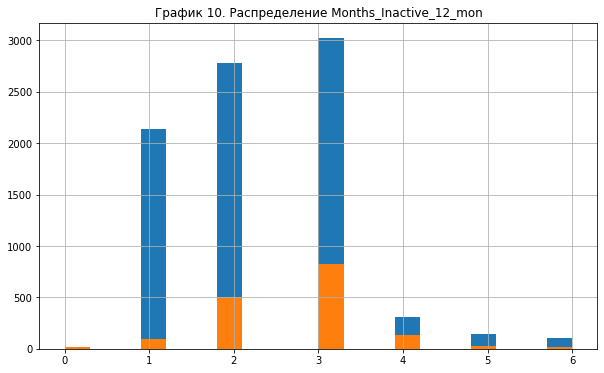

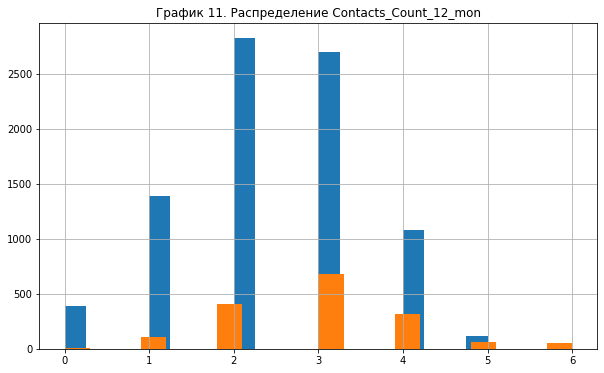

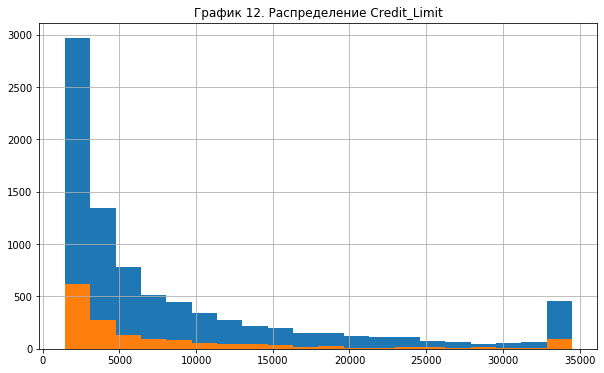

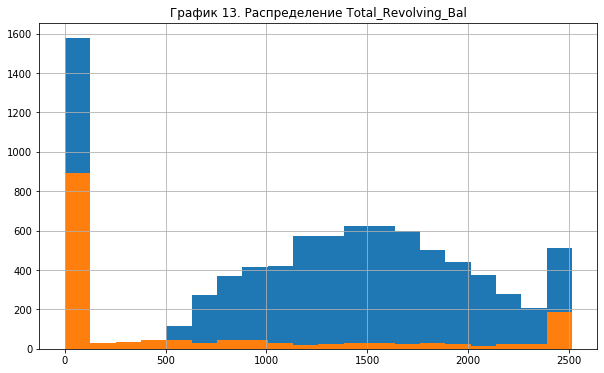

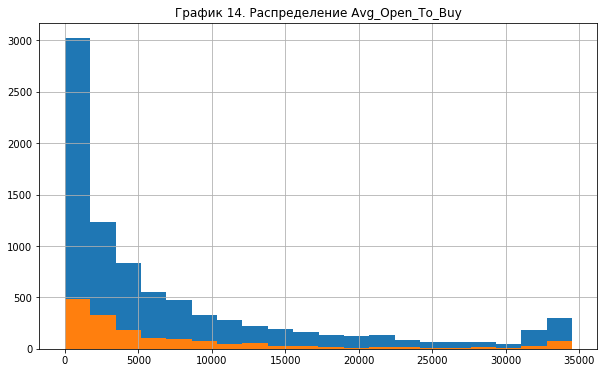

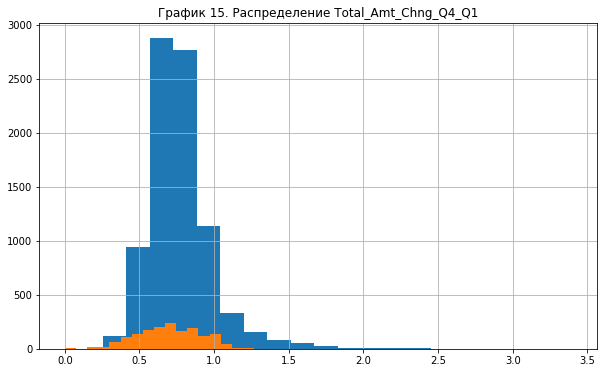

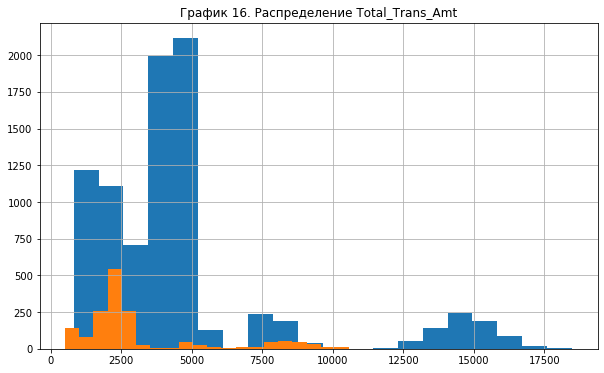

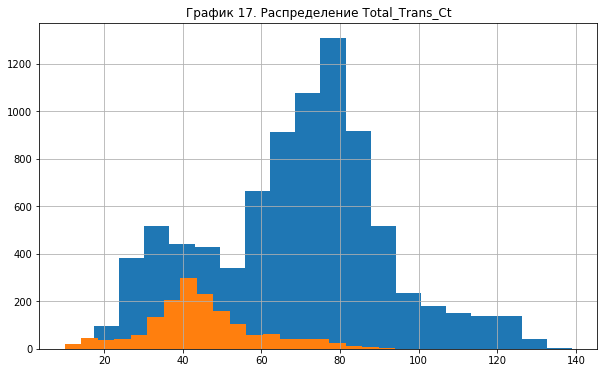

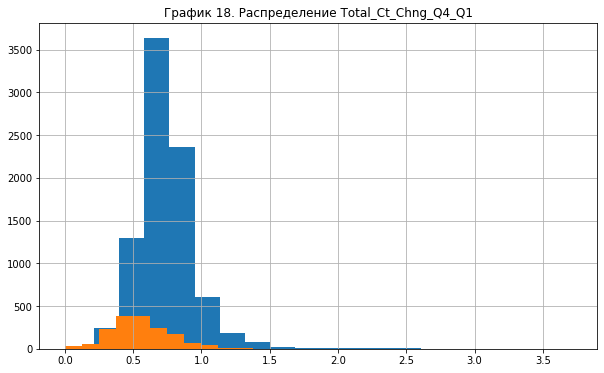

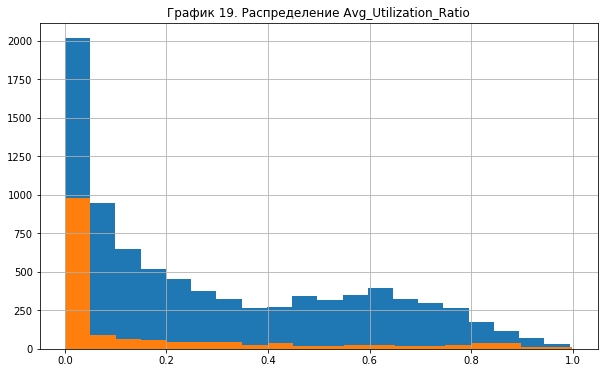

In [39]:
sns.countplot(df['Card_Category_Num'],hue=df_dem['Attrition_Flag'])
fig=plt.gcf()
fig.set_size_inches(10,6)
i = i+1
plt.title(f'График {i}. Распределение Card_Category   по существующим и покинувшим клиентам')
plt.show()

for x in df_bank.columns:
    if x != 'Attrition_Flag_Num':
        fig = plt.figure()  
        fig.set_size_inches(5, 4) 
        ax = df[x][df['Attrition_Flag_Num']== 1].hist(bins=20)
        ax = df[x][df['Attrition_Flag_Num']== 0].hist(bins=20)
        fig=plt.gcf()
        fig.set_size_inches(10,6)
        i = i+1

        plt.title(f'График {i}. Распределение {x}')
        plt.show()

Выводы по графикам:
* Пик продолжительности отношений с банком приходится на 3 года (36 месяцев), график имеет форму нормального распределения и  в целом одинаков для существующих и покинувших клиентов
* Клиенты, остающиеся с банком, пользуются от 3 до 6 банковских продуктов, в то время как превалирующее количество ушедших  клиентов пользовались 2-3 продуктами
* Распределение Количество месяцев неактивности клиента за последние 12 месяцев одинаково для для существующих и покинувших клиентов
* Уходящие клиенты в среднем имеют 3 контакта с банком в течение последних 12 месяцев, в то время как остающиеся - 2. Возможно, это связано с закрытием счетов
* Изменение объема трансакций в 4м кв. по сравнению с первым у большинства клиентов меньше единицы, т.е. объемы уменьшаются, при этом уменьшение у уходящих клиентов существеннее, чем у остающихся
* Общий объем и количество трансакций за последние 12 месяцев существенно меньше у уходящих клиентов, чем у остающихся.
* Общий оборот по кредитной карте существенно выше у остающихся клиентов, у большинства уходящих клиентов он минимален.

 По результатам визуализаций можно выдвинуть гипотеза о том, что Общий объем и количество трансакций за последние 12 месяцев (Total_Trans_amount и Total_Trans_Сt) являются основными факторами, предсказывающими отток клиентов. Также стоит обратить внимание на количество банковских продуктов в пользовании клиента, оборот по кредитной карте.

In [40]:
# КОРРЕЛЯЦИОННАЯ МАТРИЦА
np.round_(df.corr(), decimals=2)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Num,Gender_Num,Income_Category_Num,Marital_Status_Num,Education_Level_Num,Card_Category_Num
Customer_Age,1.00,-0.12,0.79,-0.01,0.05,-0.02,0.00,0.01,0.00,-0.06,-0.05,-0.07,-0.01,0.01,-0.02,0.02,0.02,0.06,-0.00,-0.02
Dependent_count,-0.12,1.00,-0.10,-0.04,-0.01,-0.04,0.07,-0.00,0.07,-0.04,0.03,0.05,0.01,-0.04,-0.02,-0.00,0.07,-0.02,0.00,0.03
Months_on_book,0.79,-0.10,1.00,-0.01,0.07,-0.01,0.01,0.01,0.01,-0.05,-0.04,-0.05,-0.01,-0.01,-0.01,0.01,0.02,0.04,0.01,-0.01
Total_Relationship_Count,-0.01,-0.04,-0.01,1.00,-0.00,0.06,-0.07,0.01,-0.07,0.05,-0.35,-0.24,0.04,0.07,0.15,-0.00,-0.00,0.01,-0.00,-0.09
Months_Inactive_12_mon,0.05,-0.01,0.07,-0.00,1.00,0.03,-0.02,-0.04,-0.02,-0.03,-0.04,-0.04,-0.04,-0.01,-0.15,0.01,-0.02,-0.00,0.00,-0.01
Contacts_Count_12_mon,-0.02,-0.04,-0.01,0.06,0.03,1.00,0.02,-0.05,0.03,-0.02,-0.11,-0.15,-0.09,-0.06,-0.20,-0.04,0.02,0.01,-0.01,-0.00
Credit_Limit,0.00,0.07,0.01,-0.07,-0.02,0.02,1.00,0.04,1.00,0.01,0.17,0.08,-0.00,-0.48,0.02,-0.42,0.48,-0.05,-0.00,0.49
Total_Revolving_Bal,0.01,-0.00,0.01,0.01,-0.04,-0.05,0.04,1.00,-0.05,0.06,0.06,0.06,0.09,0.62,0.26,-0.03,0.03,0.02,-0.01,0.03
Avg_Open_To_Buy,0.00,0.07,0.01,-0.07,-0.02,0.03,1.00,-0.05,1.00,0.01,0.17,0.07,-0.01,-0.54,0.00,-0.42,0.47,-0.06,-0.00,0.49
Total_Amt_Chng_Q4_Q1,-0.06,-0.04,-0.05,0.05,-0.03,-0.02,0.01,0.06,0.01,1.00,0.04,0.01,0.38,0.04,0.13,-0.03,0.01,0.04,-0.01,0.01


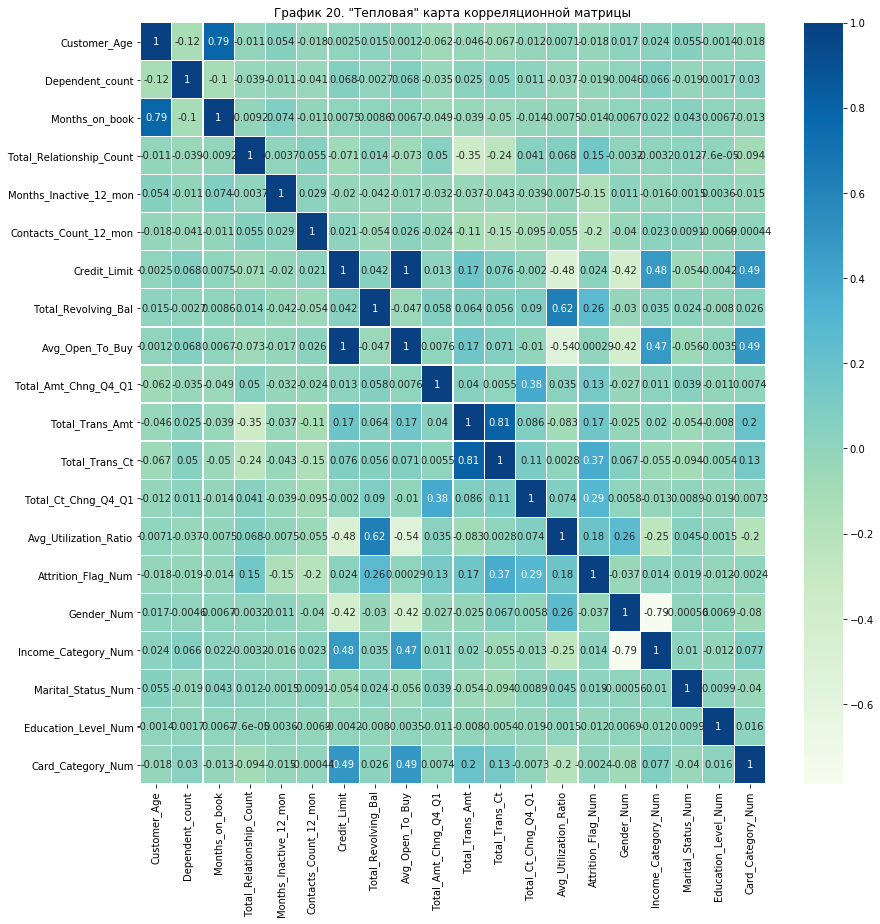

In [41]:
# ВИЗУАЛИЗАЦИЯ КОРРЕЛЯЦИОННОЙ МАТРИЦЫ
sns.heatmap(df.corr(),annot=True,cmap='GnBu',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(14,14)
i= i+1
plt.title(f'График {i}. "Тепловая" карта корреляционной матрицы')
plt.show()

Корреляционная матрица наглядно показывает взаимосвязи между такими параметрами, как:
* Avg_Open_To_Buy 	и Credit_Limit. Проанализировав данные, можно увидеть, что  Credit_Limit рассчитывается, как  Total_Revolving_Bal + Avg_Open_To_Buy, т.е. расчет этих показателей взаимосвязан.
* Total_Trans_Amt и Total_Trans_Ct, объем и количество трансакций также взаимосвязаны.
* Total_Revolving_Bal и Avg_Utilization_Ratio. Можно увидеть, что  Avg_Utilization_Ratio рассчитывается как Total_Revolving_Bal/Credit_Limit, поэтому наблюдается высокий коэффициент корреляции.
* Customer_Age и Months_on_book. Интересная взаимосвязь, говорящая о том, что чем старше человек, тем больше его длительность обслуживания в банке, при этом средний возраст клиента- 46 лет, а средняя длительность обслуживания - 3 года.
* Gender_Num и Income_Category_Num. Обратная взаимосвязь указывает на то, что женщины-клиенты банка имеют меньший уровень дохода, чем мужчины.


In [42]:
# КОРРЕЛЯЦИЯ ДАННЫХ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ
np.round_(df.corr(), decimals=2)['Attrition_Flag_Num'].sort_values().reset_index()

,index,Attrition_Flag_Num
0,Contacts_Count_12_mon,-0.20
1,Months_Inactive_12_mon,-0.15
2,Gender_Num,-0.04
3,Customer_Age,-0.02
4,Dependent_count,-0.02
5,Months_on_book,-0.01
6,Education_Level_Num,-0.01
7,Avg_Open_To_Buy,0.00
8,Card_Category_Num,-0.00
9,Income_Category_Num,0.01


Анализ корреляции не позволяет в данном исследовании выявить значимые факторы, влияющие на целевую переменную.

## 3. Построение предсказательной модели

In [43]:
# ОПРЕДЕЛЕНИЕ НЕЗАВИСИМЫХ И ЗАВИСИМОЙ ПЕРЕМЕННЫХ
X, y = df.drop('Attrition_Flag_Num', axis=1), df['Attrition_Flag_Num']

In [44]:
# РАЗДЕЛЕНИЕ ВЫБОРОК НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [45]:
# ПОСТРОЕНИЕ МОДЕЛИ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ, ВКЛЮЧАЮЩУЮ СТАНДАРТИЗАЦИЮ ДАННЫХ
pipe1 = Pipeline([('scaler', StandardScaler()), ('log', LogisticRegression(C = 50))])
pipe1.fit(X_train, Y_train) 

Pipeline(steps=[('scaler', StandardScaler()),
                ('log', LogisticRegression(C=50))])

In [46]:
# ОЦЕНКА МОДЕЛИ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ
print(classification_report(Y_test, pipe1.predict(X_test)))
print('roc_auc_score', roc_auc_score(Y_test, pipe1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.54      0.62       310
           1       0.92      0.97      0.94      1716

    accuracy                           0.90      2026
   macro avg       0.83      0.75      0.78      2026
weighted avg       0.89      0.90      0.89      2026

roc_auc_score 0.7521636965185352


In [47]:
#ОПТИМИЗАЦИЯ ПАРАМЕТРОВ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ
param_grid = {'log__C': np.logspace(-4, 4, 4)}
cv = StratifiedShuffleSplit(test_size=0.2, random_state=0)
grid = GridSearchCV(pipe1, param_grid, cv=cv )
grid.fit(X_train, Y_train) 


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log', LogisticRegression(C=50))]),
             param_grid={'log__C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04])})

In [48]:
# ОЦЕНКА ОПТИМИЗИРОВАННОЙ МОДЕЛИ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ
print(classification_report(Y_test, grid.predict(X_test)))
print('roc_auc_score', roc_auc_score(Y_test, grid.predict(X_test)))



              precision    recall  f1-score   support

           0       0.74      0.54      0.62       310
           1       0.92      0.97      0.94      1716

    accuracy                           0.90      2026
   macro avg       0.83      0.75      0.78      2026
weighted avg       0.89      0.90      0.89      2026

roc_auc_score 0.7521636965185352


In [49]:
# ПОСТРОЕНИЕ МОДЕЛИ RANDOM FOREST CLASSIFIER, ВКЛЮЧАЮЩУЮ СТАНДАРТИЗАЦИЮ ДАННЫХ
pipe2 = Pipeline([('scaler', StandardScaler()), ('rfc',RandomForestClassifier())])
pipe2.fit(X_train, Y_train) 

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfc', RandomForestClassifier())])

In [50]:
# ОЦЕНКА МОДЕЛИ RANDOM FOREST CLASSIFIER
print(classification_report(Y_test, pipe2.predict(X_test)))
print('roc_auc_score', roc_auc_score(Y_test, pipe2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       310
           1       0.97      0.99      0.98      1716

    accuracy                           0.96      2026
   macro avg       0.95      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026

roc_auc_score 0.909271373787503


In [51]:
#ОПТИМИЗАЦИЯ ПАРАМЕТРОВ МОДЕЛИ RANDOM FOREST CLASSIFIER
parametrs = {'rfc__n_estimators': range (10, 51, 10),
              'rfc__max_depth': range (1,13, 2),
              'rfc__min_samples_leaf': range (1,8),
              'rfc__min_samples_split': range (2,10,2)  }
cv = StratifiedShuffleSplit(test_size=0.2, random_state=0)
grid1 = GridSearchCV(pipe2, parametrs, cv=cv)
grid1.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__max_depth': range(1, 13, 2),
                         'rfc__min_samples_leaf': range(1, 8),
                         'rfc__min_samples_split': range(2, 10, 2),
                         'rfc__n_estimators': range(10, 51, 10)})

In [52]:
#ОЦЕНКА ОПТИМИЗИРОВАННОЙ МОДЕЛИ RANDOM FOREST CLASSIFIER
print(classification_report(Y_test, grid1.predict(X_test)))
print('roc_auc_score', roc_auc_score(Y_test, grid1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       310
           1       0.96      0.99      0.98      1716

    accuracy                           0.96      2026
   macro avg       0.95      0.88      0.91      2026
weighted avg       0.96      0.96      0.96      2026

roc_auc_score 0.8837562974659747


In [53]:
# ПОСТРОЕНИЕ МОДЕЛИ SUPPORT VECTOR CLASSIFICATION, ВКЛЮЧАЮЩУЮ СТАНДАРТИЗАЦИЮ ДАННЫХ
pipe3 = Pipeline([('scaler', StandardScaler()), ('svc',SVC())])
pipe3.fit(X_train, Y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [54]:
# ОЦЕНКА МОДЕЛИ SUPPORT VECTOR CLASSIFICATION
print(classification_report(Y_test, pipe3.predict(X_test)))
print('roc_auc_score', roc_auc_score(Y_test, pipe3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76       310
           1       0.94      0.98      0.96      1716

    accuracy                           0.93      2026
   macro avg       0.90      0.83      0.86      2026
weighted avg       0.93      0.93      0.93      2026

roc_auc_score 0.8298330701556509


In [55]:
#ОПТИМИЗАЦИЯ ПАРАМЕТРОВ МОДЕЛИ  SUPPORT VECTOR CLASSIFICATION
parametrs = {'svc__C':[1,10,100,1000],'svc__gamma':[1,0.1,0.001,0.0001], 'svc__kernel':['linear','rbf']}
grid2 = GridSearchCV(pipe3, parametrs, cv=5)
grid2.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [1, 10, 100, 1000],
                         'svc__gamma': [1, 0.1, 0.001, 0.0001],
                         'svc__kernel': ['linear', 'rbf']})

In [56]:
# ОЦЕНКА ОПТИМИЗИРОВАННОЙ МОДЕЛИ SUPPORT VECTOR CLASSIFICATION
print(classification_report(Y_test, grid2.predict(X_test)))
print('roc_auc_score', roc_auc_score(Y_test, grid2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76       310
           1       0.95      0.97      0.96      1716

    accuracy                           0.93      2026
   macro avg       0.89      0.84      0.86      2026
weighted avg       0.93      0.93      0.93      2026

roc_auc_score 0.8404052936311002


In [57]:
# СВОДНАЯ ТАБЛИЦА ПОКАЗАТЕЛЕЙ ОЦЕНОК МОДЕЛЕЙ
data = {'model':['log_regression_opt', 'RFC_opt', 'SVC_opt'], 
        'accuracy':[accuracy_score(Y_test, grid.predict(X_test)), accuracy_score(Y_test, grid1.predict(X_test)), accuracy_score(Y_test, grid2.predict(X_test))],
        'precision':[precision_score(Y_test, grid.predict(X_test)), precision_score(Y_test, grid1.predict(X_test)), precision_score(Y_test, grid2.predict(X_test))],
        'recall':[recall_score(Y_test, grid.predict(X_test)), recall_score(Y_test, grid1.predict(X_test)), recall_score(Y_test, grid2.predict(X_test))],
        'f1-score':[f1_score(Y_test, grid.predict(X_test)), f1_score(Y_test, grid1.predict(X_test)), f1_score(Y_test, grid2.predict(X_test))],
        'roc_auc_score':[roc_auc_score(Y_test, grid.predict(X_test)), roc_auc_score(Y_test, grid1.predict(X_test)), roc_auc_score(Y_test, grid2.predict(X_test))]}

report = pd.DataFrame(data)
report.style.background_gradient()

,model,accuracy,precision,recall,f1-score,roc_auc_score
0,log_regression_opt,0.900296,0.920556,0.965618,0.942548,0.752164
1,RFC_opt,0.957552,0.960973,0.990093,0.975316,0.883756
2,SVC_opt,0.933366,0.948383,0.974359,0.961196,0.840405


 По всем значимым показателям оценки моделей модель RFC демонстрирует лучший результат. С показателем точности 95% модель позволяет предсказать, перестанет клиент пользоваться услугами банка или нет.

In [58]:
#РАСЧЕТ МАТРИЦЫ ОШИБОК
result = pd.DataFrame([Y_test.values, grid1.predict(X_test)]).T
confusion_matrix = pd.crosstab(result[0], result[1], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,241,69
1,17,1699


In [59]:
# ОПРЕДЕЛЕНИЕ ЗНАЧИМЫХ ПАРАМЕТРОВ

features = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
        'Gender_Num', 'Income_Category_Num',
       'Marital_Status_Num', 'Education_Level_Num', 'Card_Category_Num']

importance = grid1.best_estimator_.steps[1][1].feature_importances_


feature_importance = pd.DataFrame(features, columns = ['Feature'])

feature_importance['Score'] = importance

feature_importance= feature_importance.sort_values(by=['Score'], ascending=False)
feature_importance.style.bar()

,Feature,Score
11,Total_Trans_Ct,0.202834
10,Total_Trans_Amt,0.178111
12,Total_Ct_Chng_Q4_Q1,0.114521
7,Total_Revolving_Bal,0.110384
13,Avg_Utilization_Ratio,0.069832
3,Total_Relationship_Count,0.065566
9,Total_Amt_Chng_Q4_Q1,0.052242
6,Credit_Limit,0.029918
4,Months_Inactive_12_mon,0.028668
8,Avg_Open_To_Buy,0.028131


На модель оказывают наибольшее  влияние следующие факторы:
* Total_Trans_Amt Общий объем трансакций за последние 12 месяцев
* Total_Trans_Ct Общее число трансакций за последние 12 месяцев
* Total_Revolving_Bal Общий оборот по кредитной карте
* Total_Amt_Chng_Q4_Q1 Изменение в объеме трансакциий (4 квартала по сравнению с 1м)
* Total_Relationship_Count Общее количество продуктов банка, используемых клиентом


